# EDA：資料分布介紹及繪圖

## 作業程式碼
- 本作業將請學員完成以下要求
    - 請從 Kaggle 平台找尋有興趣的資料集，建議資料筆數超過 10000 筆以上，且需為表格資料
    - 參考範例程式碼，使用 Matplotlib 繪製許多長條圖、散佈圖、盒鬚圖、折線圖等，並搭配圖表標題、X軸與Y軸標題

### 匯入所需套件

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 輸入資料

In [39]:
# 輸入資料
# This is the data from UCI online reatil II (541,910 rows, 8 columns), which was aggragated into customer level
# and clustered with K-means(K=3)
df = pd.read_csv("labeled_features.csv")
df.head(5)

,Customer ID,Recency_scaled,Frequency_scaled,Monetary_scaled,AvgUnitPrice_scaled,UniqueItems_scaled,AvgQuantPerOrder_scaled,cluster
0,12346.0,2.334858,-0.424675,8.359634,-0.100146,-0.708687,60.891574,3
1,12347.0,-0.905199,0.354080,0.251046,-0.053249,0.486336,-0.028273,1
2,12348.0,-0.175186,-0.035297,-0.028547,0.037994,-0.462653,0.022638,1
3,12349.0,-0.735196,-0.424675,-0.032963,0.111794,0.134858,-0.032264,1
4,12350.0,2.174855,-0.424675,-0.191316,-0.018248,-0.521232,-0.029847,2


In [40]:
df.shape

(4339, 8)

### 繪製長條圖

In [ ]:
df_cluster = df["cluster"].value_counts()
df_cluster

cluster
1    3181
2    1140
3      18
Name: count, dtype: int64

<BarContainer object of 2 artists>

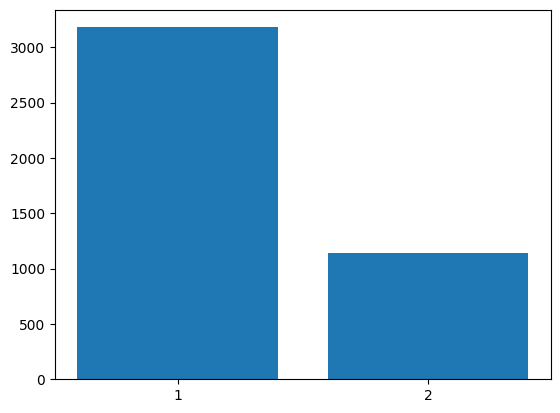

In [50]:
plt.bar(x=df_cluster.head(2).index.astype(str), height=df_cluster.head(2).values)

### 繪製盒鬚圖

Text(0.5, 0, 'Recency_scaled')

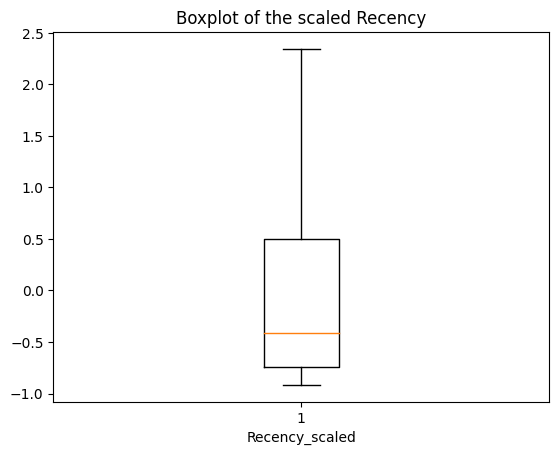

In [53]:
plt.boxplot(df["Recency_scaled"], showfliers=False)
plt.title("Boxplot of the scaled Recency")
plt.xlabel("Recency_scaled")

### 繪製散佈圖

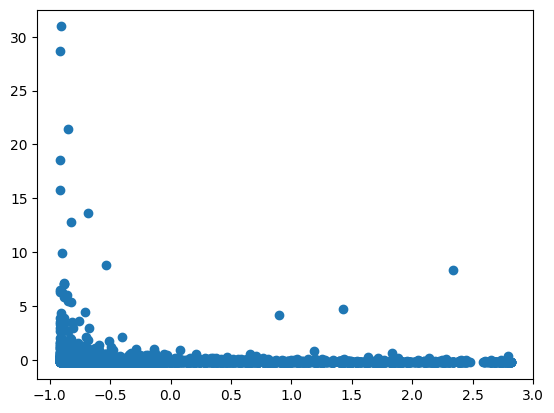

In [54]:
plt.scatter(x=df["Recency_scaled"], y=df["Monetary_scaled"])


### 繪製折線圖

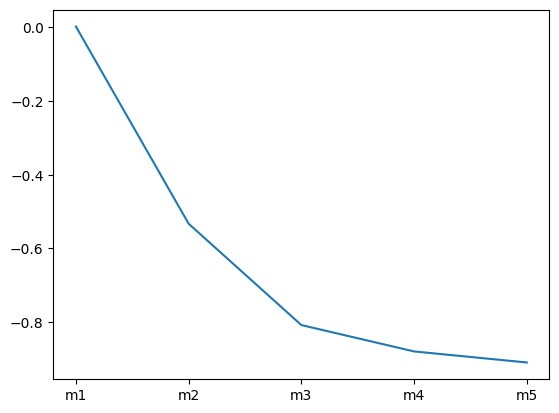

In [58]:
df["Monetary_group"] = pd.cut(df["Monetary_scaled"], 5, labels=["m1", "m2", "m3", "m4", "m5"])
Monetary_Recency = df.groupby(by = "Monetary_group").mean()["Recency_scaled"].to_frame().reset_index()
plt.plot(Monetary_Recency["Monetary_group"], Monetary_Recency["Recency_scaled"])